Introduction

This data analysis project looks at two different data sets from retail giant Walmart to look at prices and popular brands. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import seaborn as sns



Load data

Two datasets are used in this project:
walmart.csv 
WMT_Grocery_202209.csv 



In [2]:
#Read data files
df = pd.read_csv('data/walmart.csv')
df1 = pd.read_csv('data/WMT_Grocery_202209.csv')



C:\Users\Angel Dawn\AppData\Local\Temp\ipykernel_10300\175111624.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('data/WMT_Grocery_202209.csv')


Starting to look at the data and then cleaning the data

In [3]:
#Look at data types for WMT Grocery data set
df1.dtypes

index                  int64
SHIPPING_LOCATION      int64
DEPARTMENT            object
CATEGORY              object
SUBCATEGORY           object
BREADCRUMBS           object
SKU                    int64
PRODUCT_URL           object
PRODUCT_NAME          object
BRAND                 object
PRICE_RETAIL         float64
PRICE_CURRENT        float64
PRODUCT_SIZE          object
PROMOTION            float64
RunDate               object
tid                    int64
dtype: object

In [4]:
#Describe walmart data set
df.describe()

,sku,gtin13,price,avg_rating,reviews_count
count,5.000000e+02,3.510000e+02,499.000000,243.000000,243.00000
mean,6.211243e+08,5.010059e+11,26.082946,4.265844,356.81070
std,4.920216e+08,3.296772e+11,29.228484,0.918331,1369.14426
min,1.118745e+06,1.111102e+10,1.000000,1.000000,1.00000
25%,2.295070e+08,8.107358e+10,9.630000,4.050000,2.00000
50%,5.444722e+08,6.759061e+11,15.990000,4.600000,11.00000
75%,8.789888e+08,7.695769e+11,31.785000,4.900000,106.50000
max,2.739083e+09,9.435705e+11,249.000000,5.000000,13676.00000


In [5]:
#Describe WMT Grocery data set
df1.describe()

,index,SHIPPING_LOCATION,SKU,PRICE_RETAIL,PRICE_CURRENT,PROMOTION,tid
count,568534.000000,568534.000000,5.685340e+05,568534.000000,568534.000000,0.0,5.685340e+05
mean,284266.500000,57713.149935,2.453284e+08,5.105377,5.079274,NaN,1.644807e+07
std,164121.773309,24113.969156,3.049375e+08,4.824906,4.727971,NaN,1.641218e+05
min,0.000000,6010.000000,8.795550e+05,0.160000,0.160000,NaN,1.616380e+07
25%,142133.250000,33647.000000,1.555602e+07,2.480000,2.480000,NaN,1.630594e+07
50%,284266.500000,63376.000000,5.003978e+07,3.880000,3.880000,NaN,1.644807e+07
75%,426399.750000,77449.000000,4.448820e+08,5.980000,5.980000,NaN,1.659020e+07
max,568533.000000,96797.000000,1.996767e+09,246.870000,246.870000,NaN,1.673234e+07


In [6]:
#Info on walmart data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    500 non-null    object 
 1   url                      500 non-null    object 
 2   brand                    500 non-null    object 
 3   main_image               500 non-null    object 
 4   sku                      500 non-null    int64  
 5   description              498 non-null    object 
 6   gtin13                   351 non-null    float64
 7   model                    257 non-null    object 
 8   currency                 499 non-null    object 
 9   price                    499 non-null    float64
 10  availableDeliveryMethod  500 non-null    object 
 11  primary_category         500 non-null    object 
 12  sub_category_1           500 non-null    object 
 13  sub_category_2           490 non-null    object 
 14  images                   5

In [7]:
#Info on WMT Grocery data set
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568534 entries, 0 to 568533
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              568534 non-null  int64  
 1   SHIPPING_LOCATION  568534 non-null  int64  
 2   DEPARTMENT         568534 non-null  object 
 3   CATEGORY           568534 non-null  object 
 4   SUBCATEGORY        361324 non-null  object 
 5   BREADCRUMBS        568534 non-null  object 
 6   SKU                568534 non-null  int64  
 7   PRODUCT_URL        568534 non-null  object 
 8   PRODUCT_NAME       568534 non-null  object 
 9   BRAND              568507 non-null  object 
 10  PRICE_RETAIL       568534 non-null  float64
 11  PRICE_CURRENT      568534 non-null  float64
 12  PRODUCT_SIZE       505709 non-null  object 
 13  PROMOTION          0 non-null       float64
 14  RunDate            568534 non-null  object 
 15  tid                568534 non-null  int64  
dtypes:

In [8]:
#Look at columns in walmart data set
df.columns

Index(['title', 'url', 'brand', 'main_image', 'sku', 'description', 'gtin13',
       'model', 'currency', 'price', 'availableDeliveryMethod',
       'primary_category', 'sub_category_1', 'sub_category_2', 'images',
       'specifications', 'directions', 'ingredients', 'avg_rating',
       'reviews_count', 'uniq_id', 'scraped_at'],
      dtype='object')

In [9]:
#Look at columns in WMT Grocery data set
df1.columns

Index(['index', 'SHIPPING_LOCATION', 'DEPARTMENT', 'CATEGORY', 'SUBCATEGORY',
       'BREADCRUMBS', 'SKU', 'PRODUCT_URL', 'PRODUCT_NAME', 'BRAND',
       'PRICE_RETAIL', 'PRICE_CURRENT', 'PRODUCT_SIZE', 'PROMOTION', 'RunDate',
       'tid'],
      dtype='object')

In [10]:
#Look at head of walmart data set
df.head()

,title,url,brand,main_image,sku,description,gtin13,model,currency,price,...,sub_category_1,sub_category_2,images,specifications,directions,ingredients,avg_rating,reviews_count,uniq_id,scraped_at
0,Nuventin Anti-Wrinkle Retinol Cream with Hyalu...,https://www.walmart.com/ip/Nuventin-Anti-Wrink...,Nuventin,https://i5.walmartimages.com/asr/2d247025-a02e...,420971989,<p>Made with the number 1 recommended anti-agi...,8.104000e+11,NV001,USD,14.99,...,Bath & Body,Body Lotions,https://i5.walmartimages.com/asr/a8125edc-a1de...,"[{'name': 'Skin Type', 'value': 'All'}, {'name...",NaN,Water (Aqua) Mineral Oil Cetearyl Alcohol Glyc...,4.0,10.0,9131f420-2935-55c0-b112-7f67afd5e964,16/11/2022 23:21:34
1,DURASACK 48-Gallon Green Outdoor Polypropylene...,https://www.walmart.com/ip/DURASACK-48-Gallon-...,DURASACK®,https://i5.walmartimages.com/asr/e474980a-372c...,140920669,"DURASACK by Halsted - For hauling, cleaning, h...",6.532120e+11,BB-2028CTN,USD,17.99,...,Outdoor Power Equipment,Outdoor Power Equipment Parts and Accessories,https://i5.walmartimages.com/asr/4721180a-81fe...,[{'name': 'Assembled Product Dimensions (L x W...,NaN,NaN,4.9,31.0,8a7da806-be2c-57db-a064-305cd9097dec,16/11/2022 23:21:34
2,CE003-03-2 Ring sling Air-O size 2 AQUA Baby c...,https://www.walmart.com/ip/CE003-03-2-Ring-sli...,Chimparoo,https://i5.walmartimages.com/asr/617220d8-886d...,151317860,CE003-03-2 Ring sling Air-O size 2 AQUA Baby c...,8.745760e+11,NaN,USD,84.69,...,Baby Activities & Gear,Baby Carriers,https://i5.walmartimages.com/asr/617220d8-886d...,"[{'name': 'Brand', 'value': 'Chimparoo'}, {'na...",NaN,NaN,NaN,NaN,9609ca38-203e-5ddd-9552-6021c7f3e5a8,16/11/2022 23:21:35
3,"Monster Energy Java Monster Mean Bean, Coffee ...",https://www.walmart.com/ip/Monster-Energy-Java...,Monster Energy,https://i5.walmartimages.com/asr/a6c5940d-9995...,1145871245,"<br>Monster Energy Java Monster Mean Bean, Cof...",1.003784e+11,NaN,USD,41.99,...,Beverages,Energy Drinks,https://i5.walmartimages.com/asr/e6118707-f8fd...,"[{'name': 'Brand', 'value': 'Monster Energy'}]",NaN,NaN,NaN,NaN,eda2c112-68b1-5024-a62e-caa0181f03c9,16/11/2022 23:21:37
4,Comforter set matching fitted sheet set and pi...,https://www.walmart.com/ip/Comforter-set-match...,SAMIMPORT-2011,https://i5.walmartimages.com/asr/d42d61c8-3423...,907696530,It’s important you help them build a comfortab...,6.906841e+11,NaN,USD,45.00,...,Toddlers' Room,Toddler Bedding,https://i5.walmartimages.com/asr/52fa07d0-b7be...,"[{'name': 'Assembled Product Weight', 'value':...",*gentle cycle *tumble dry low *do not bleach *...,NaN,4.3,23.0,5b17cebf-6789-5327-91dc-d04d8cc3691c,16/11/2022 23:21:37


In [11]:
#Look at head of WMT Grocery data set
df1.head()


,index,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,SKU,PRODUCT_URL,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,PROMOTION,RunDate,tid
0,0,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",110895339,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Red Pepper Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163804
1,1,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",105455228,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Garlic Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163805
2,2,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",128642379,https://www.walmart.com/ip/Marketside-Classic-...,"Marketside Classic Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163806
3,3,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",366126367,https://www.walmart.com/ip/Marketside-Everythi...,"Marketside Everything Hummus, 10 oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163807
4,4,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",160090316,https://www.walmart.com/ip/Price-s-Jalapeno-Di...,"Price's Jalapeno Dip, 12 Oz.",Price's,3.12,3.12,12,NaN,2022-09-11 21:20:04,16163808


In [12]:
#Check null counts of walmart data set
null_counts = df.isna().sum()
print(null_counts)




title                        0
url                          0
brand                        0
main_image                   0
sku                          0
description                  2
gtin13                     149
model                      243
currency                     1
price                        1
availableDeliveryMethod      0
primary_category             0
sub_category_1               0
sub_category_2              10
images                       0
specifications              33
directions                 394
ingredients                404
avg_rating                 257
reviews_count              257
uniq_id                      0
scraped_at                   0
dtype: int64


In [13]:
#Check null counts of walmart data set
null_counts = df1.isna().sum()
print(null_counts)


index                     0
SHIPPING_LOCATION         0
DEPARTMENT                0
CATEGORY                  0
SUBCATEGORY          207210
BREADCRUMBS               0
SKU                       0
PRODUCT_URL               0
PRODUCT_NAME              0
BRAND                    27
PRICE_RETAIL              0
PRICE_CURRENT             0
PRODUCT_SIZE          62825
PROMOTION            568534
RunDate                   0
tid                       0
dtype: int64


In [14]:
#Convert column titles to upper case
df.columns = df.columns.str.upper()
df1.columns = df1.columns.str.upper()

Drop columns and rename columns before merging
Removed unwated columns that were not wanted for data analysis

In [15]:
#Drop unnecessary columns from walmart data set
df.drop(['MAIN_IMAGE', 'DESCRIPTION', 'GTIN13', 'MODEL', 'CURRENCY', 'AVAILABLEDELIVERYMETHOD', 'IMAGES', 'SPECIFICATIONS', 'DIRECTIONS', 'INGREDIENTS', 'UNIQ_ID', 'REVIEWS_COUNT'],axis=1, inplace=True)

In [16]:
#Drop unnecessary columsn from WMT Grocery data set
df1.drop(['INDEX', 'SHIPPING_LOCATION', 'BREADCRUMBS', 'PRICE_RETAIL', 'PROMOTION', 'TID'],axis=1, inplace=True)

In [17]:
#Rename column in walmart data set
df.rename(columns={'PRIMARY_CATEGORY': 'CATEGORY'}, inplace=True)

In [18]:
#Rename columns in WMT Grocery data set
df1.rename(columns={'PRODUCT_URL': 'URL', 'PRICE_CURRENT': 'PRICE', 'RUNDATE': 'SCRAPED_AT'}, inplace=True)

In [19]:
#Renaming more columns in walmart data set
df.rename(columns={'TITLE': 'PRODUCT_NAME', 'SUB_CATEGORY_1': 'SUBCATEGORY'}, inplace=True)

In [20]:
#Checking walmart data set head again
df.head()

,PRODUCT_NAME,URL,BRAND,SKU,PRICE,CATEGORY,SUBCATEGORY,SUB_CATEGORY_2,AVG_RATING,SCRAPED_AT
0,Nuventin Anti-Wrinkle Retinol Cream with Hyalu...,https://www.walmart.com/ip/Nuventin-Anti-Wrink...,Nuventin,420971989,14.99,Personal Care,Bath & Body,Body Lotions,4.0,16/11/2022 23:21:34
1,DURASACK 48-Gallon Green Outdoor Polypropylene...,https://www.walmart.com/ip/DURASACK-48-Gallon-...,DURASACK®,140920669,17.99,Patio & Garden,Outdoor Power Equipment,Outdoor Power Equipment Parts and Accessories,4.9,16/11/2022 23:21:34
2,CE003-03-2 Ring sling Air-O size 2 AQUA Baby c...,https://www.walmart.com/ip/CE003-03-2-Ring-sli...,Chimparoo,151317860,84.69,Baby,Baby Activities & Gear,Baby Carriers,NaN,16/11/2022 23:21:35
3,"Monster Energy Java Monster Mean Bean, Coffee ...",https://www.walmart.com/ip/Monster-Energy-Java...,Monster Energy,1145871245,41.99,Food,Beverages,Energy Drinks,NaN,16/11/2022 23:21:37
4,Comforter set matching fitted sheet set and pi...,https://www.walmart.com/ip/Comforter-set-match...,SAMIMPORT-2011,907696530,45.00,Baby,Toddlers' Room,Toddler Bedding,4.3,16/11/2022 23:21:37


In [21]:
#Renaming more columns in walmart data set that align better with how columns are named in WMT Grocery data set
df.rename(columns={'CATEGORY': 'DEPARTMENT', 'SUBCATEGORY': 'CATEGORY', 'SUB_CATEGORY_2': 'SUBCATEGORY'}, inplace=True)

In [22]:
#Merging walmart and WMT Grocery data sets on set columns
merged_df = pd.merge(df, df1, on=['SKU', 'PRODUCT_NAME', 'BRAND', 'PRICE', 'URL', 'DEPARTMENT', 'SCRAPED_AT', 'CATEGORY', 'SUBCATEGORY'], how='outer')

In [23]:
#Looking at columns after merge
merged_df.columns

Index(['PRODUCT_NAME', 'URL', 'BRAND', 'SKU', 'PRICE', 'DEPARTMENT',
       'CATEGORY', 'SUBCATEGORY', 'AVG_RATING', 'SCRAPED_AT', 'PRODUCT_SIZE'],
      dtype='object')

In [24]:
#Looking at head of data after merge
merged_df.head()

,PRODUCT_NAME,URL,BRAND,SKU,PRICE,DEPARTMENT,CATEGORY,SUBCATEGORY,AVG_RATING,SCRAPED_AT,PRODUCT_SIZE
0,Brew Rite Paper Coffee Filter (200 Pack),https://www.walmart.com/ip/Brew-Rite-Paper-Cof...,Brew Rite,879555,1.88,Coffee,Coffee Accessories,Coffee Filters,NaN,2022-09-11 21:20:04,NaN
1,Brew Rite Paper Coffee Filter (200 Pack),https://www.walmart.com/ip/Brew-Rite-Paper-Cof...,Brew Rite,879555,1.88,Coffee,Coffee Accessories,Coffee Filters,NaN,2022-09-11 21:20:04,NaN
2,Brew Rite Paper Coffee Filter (200 Pack),https://www.walmart.com/ip/Brew-Rite-Paper-Cof...,Brew Rite,879555,1.98,Coffee,Coffee Accessories,Coffee Filters,NaN,2022-09-11 21:20:04,NaN
3,Brew Rite Paper Coffee Filter (200 Pack),https://www.walmart.com/ip/Brew-Rite-Paper-Cof...,Brew Rite,879555,1.98,Coffee,Coffee Accessories,Coffee Filters,NaN,2022-09-11 21:20:04,NaN
4,Brew Rite Paper Coffee Filter (200 Pack),https://www.walmart.com/ip/Brew-Rite-Paper-Cof...,Brew Rite,879555,1.98,Coffee,Coffee Accessories,Coffee Filters,NaN,2022-09-11 21:20:04,NaN


In [25]:
#Reordering data columns
desired_order = ['PRODUCT_NAME', 'BRAND', 'DEPARTMENT', 'CATEGORY', 'SUBCATEGORY', 'PRICE', 'PRODUCT_SIZE', 'SKU', 'URL', 'AVG_RATING', 'SCRAPED_AT']
df_reordered = merged_df[desired_order]



In [26]:
df_reordered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569034 entries, 0 to 569033
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   PRODUCT_NAME  569034 non-null  object 
 1   BRAND         569007 non-null  object 
 2   DEPARTMENT    569034 non-null  object 
 3   CATEGORY      569034 non-null  object 
 4   SUBCATEGORY   361814 non-null  object 
 5   PRICE         569033 non-null  float64
 6   PRODUCT_SIZE  505709 non-null  object 
 7   SKU           569034 non-null  int64  
 8   URL           569034 non-null  object 
 9   AVG_RATING    243 non-null     float64
 10  SCRAPED_AT    569034 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 47.8+ MB


In [27]:
#Drop AVG_RATING column
df_reordered.drop('AVG_RATING', axis=1, inplace=True)

C:\Users\Angel Dawn\AppData\Local\Temp\ipykernel_10300\2226536717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reordered.drop('AVG_RATING', axis=1, inplace=True)


Looking at data further after merge of data sets and sorting columns into desired order then looking into data tyes and changing as needed

In [28]:
df_reordered.head()

,PRODUCT_NAME,BRAND,DEPARTMENT,CATEGORY,SUBCATEGORY,PRICE,PRODUCT_SIZE,SKU,URL,SCRAPED_AT
0,Brew Rite Paper Coffee Filter (200 Pack),Brew Rite,Coffee,Coffee Accessories,Coffee Filters,1.88,NaN,879555,https://www.walmart.com/ip/Brew-Rite-Paper-Cof...,2022-09-11 21:20:04
1,Brew Rite Paper Coffee Filter (200 Pack),Brew Rite,Coffee,Coffee Accessories,Coffee Filters,1.88,NaN,879555,https://www.walmart.com/ip/Brew-Rite-Paper-Cof...,2022-09-11 21:20:04
2,Brew Rite Paper Coffee Filter (200 Pack),Brew Rite,Coffee,Coffee Accessories,Coffee Filters,1.98,NaN,879555,https://www.walmart.com/ip/Brew-Rite-Paper-Cof...,2022-09-11 21:20:04
3,Brew Rite Paper Coffee Filter (200 Pack),Brew Rite,Coffee,Coffee Accessories,Coffee Filters,1.98,NaN,879555,https://www.walmart.com/ip/Brew-Rite-Paper-Cof...,2022-09-11 21:20:04
4,Brew Rite Paper Coffee Filter (200 Pack),Brew Rite,Coffee,Coffee Accessories,Coffee Filters,1.98,NaN,879555,https://www.walmart.com/ip/Brew-Rite-Paper-Cof...,2022-09-11 21:20:04


In [29]:
df_reordered.describe()

,PRICE,SKU
count,569033.000000,5.690340e+05
mean,5.097693,2.456586e+08
std,4.844408,3.053546e+08
min,0.160000,8.795550e+05
25%,2.480000,1.555605e+07
50%,3.880000,5.017812e+07
75%,5.980000,4.452366e+08
max,249.000000,2.739083e+09


In [30]:
#Check data types
df_reordered.dtypes

PRODUCT_NAME     object
BRAND            object
DEPARTMENT       object
CATEGORY         object
SUBCATEGORY      object
PRICE           float64
PRODUCT_SIZE     object
SKU               int64
URL              object
SCRAPED_AT       object
dtype: object

In [31]:
#Setting new data types
df_reordered = df_reordered.astype({'PRODUCT_NAME': str, 'BRAND': str, 'DEPARTMENT': str, 'CATEGORY': str, 'SUBCATEGORY': str})


In [32]:
#Converting SCRAPED_AT to datatime 
df_reordered['SCRAPED_AT'] = pd.to_datetime(df_reordered['SCRAPED_AT'], format='mixed', errors='coerce')


Calculating some data from data in dataset
Found most common brand is Great Value
Found average price per brand
Found average price for Great Value brand 
Found average price per department

In [33]:
most_common_brand_vc = df_reordered['BRAND'].value_counts().index[0]
print(most_common_brand_vc)

most_common_brand_count = df_reordered['BRAND'].value_counts().iloc[0]
print(most_common_brand_count)


Great Value
80388


In [34]:
# Calculate average price per brand
average_price_per_brand = df_reordered.groupby('BRAND')['PRICE'].mean()

print(average_price_per_brand)

BRAND
"Slap Ya Mama"        5.500000
.                    12.960000
0I                    4.395500
1-2-3                 6.398367
1-2-3 Gluten Free     3.473684
                       ...    
vibi+                 1.780000
vitaminwater          3.329814
wartleves             5.730000
windfall             14.490000
zhongxinda            5.660000
Name: PRICE, Length: 4755, dtype: float64


In [35]:
# Sort the Series by average price in descending order
sorted_avg_price_per_brand = average_price_per_brand.sort_values(ascending=False)

print(sorted_avg_price_per_brand)

BRAND
Carter's by DaVinci         249.00
Pawhut                      209.99
Hoover                      169.99
Diptyque                    168.60
Essity                      165.17
                             ...  
Q and Q                       0.50
Goetze's Candy Cow Tales      0.48
Del Fuerte                    0.48
Thai Chef                     0.36
BESTHUA                        NaN
Name: PRICE, Length: 4755, dtype: float64


In [36]:
gv_avg_price = average_price_per_brand['Great Value']
print(f"Average price for Great Value: {gv_avg_price}")

Average price for Great Value: 3.870936955764542


In [37]:
# Calculate average price per department
average_price_per_dept = df_reordered.groupby('DEPARTMENT')['PRICE'].mean()

print(average_price_per_dept)

DEPARTMENT
Alcohol                    13.305408
Arts Crafts & Sewing        8.290000
Auto & Tires               12.424000
Baby                       38.209828
Bakery & Bread              4.372926
Baking                      4.932217
Beauty                     12.764194
Beverages                   4.406629
Breakfast & Cereal          4.973801
Candy                       5.308146
Clothing                   19.090000
Coffee                      8.958407
Dairy & Eggs                3.930008
Deli                        5.406048
Food                       29.475667
Fresh Produce               3.802198
Frozen                      5.971842
Health and Medicine        32.690000
Home                       22.521176
Home Improvement           10.490000
Household Essentials       28.179835
Industrial & Scientific    51.838333
Meat & Seafood              6.742689
Office Supplies             9.970000
Pantry                      3.427560
Party & Occasions          12.695000
Patio & Garden             

In [38]:
# Sort the Series by average price in descending order
sorted_avg_price_per_dept = average_price_per_dept.sort_values(ascending=False)

print(sorted_avg_price_per_dept)

DEPARTMENT
Industrial & Scientific    51.838333
Baby                       38.209828
Premium Beauty             35.273333
Pets                       33.529231
Health and Medicine        32.690000
Toys                       32.545000
Sports & Outdoors          30.895000
Food                       29.475667
Household Essentials       28.179835
Home                       22.521176
Clothing                   19.090000
Personal Care              18.947760
Patio & Garden             18.207500
Alcohol                    13.305408
Beauty                     12.764194
Party & Occasions          12.695000
Auto & Tires               12.424000
Home Improvement           10.490000
Office Supplies             9.970000
Coffee                      8.958407
Arts Crafts & Sewing        8.290000
Meat & Seafood              6.742689
Frozen                      5.971842
Deli                        5.406048
Candy                       5.308146
Snacks                      5.008393
Breakfast & Cereal         

In [39]:
# Save the cleaned DataFrame to a new CSV file without the index
df_reordered.to_csv('cleaned_data.csv', index=False)

In [40]:
df_reordered.columns

Index(['PRODUCT_NAME', 'BRAND', 'DEPARTMENT', 'CATEGORY', 'SUBCATEGORY',
       'PRICE', 'PRODUCT_SIZE', 'SKU', 'URL', 'SCRAPED_AT'],
      dtype='object')

Create new column PRICE_TIER to sort into price ranges

In [41]:
# Define the bins and labels for your tiers
bins = [0, 25, 75, np.inf] # Bins: 0-25, 25-75, 75-infinity
labels = ['Low', 'Medium', 'High']

df_reordered['PRICE_TIER'] = pd.cut(df_reordered['PRICE'], bins=bins, labels=labels, right=False)

df_reordered.head()

,PRODUCT_NAME,BRAND,DEPARTMENT,CATEGORY,SUBCATEGORY,PRICE,PRODUCT_SIZE,SKU,URL,SCRAPED_AT,PRICE_TIER
0,Brew Rite Paper Coffee Filter (200 Pack),Brew Rite,Coffee,Coffee Accessories,Coffee Filters,1.88,NaN,879555,https://www.walmart.com/ip/Brew-Rite-Paper-Cof...,2022-09-11 21:20:04,Low
1,Brew Rite Paper Coffee Filter (200 Pack),Brew Rite,Coffee,Coffee Accessories,Coffee Filters,1.88,NaN,879555,https://www.walmart.com/ip/Brew-Rite-Paper-Cof...,2022-09-11 21:20:04,Low
2,Brew Rite Paper Coffee Filter (200 Pack),Brew Rite,Coffee,Coffee Accessories,Coffee Filters,1.98,NaN,879555,https://www.walmart.com/ip/Brew-Rite-Paper-Cof...,2022-09-11 21:20:04,Low
3,Brew Rite Paper Coffee Filter (200 Pack),Brew Rite,Coffee,Coffee Accessories,Coffee Filters,1.98,NaN,879555,https://www.walmart.com/ip/Brew-Rite-Paper-Cof...,2022-09-11 21:20:04,Low
4,Brew Rite Paper Coffee Filter (200 Pack),Brew Rite,Coffee,Coffee Accessories,Coffee Filters,1.98,NaN,879555,https://www.walmart.com/ip/Brew-Rite-Paper-Cof...,2022-09-11 21:20:04,Low


Creating function to analyze the price tier distribution for a given department

In [42]:
def get_price_tier_distribution(department_name):

    # Filter the DataFrame for the specified department
    department_data = df_reordered[df_reordered['DEPARTMENT'] == department_name]

    # Get the count of products for each price tier
    count_distribution = department_data['PRICE_TIER'].value_counts()

    # Get the percentage distribution
    percentage_distribution = department_data['PRICE_TIER'].value_counts(normalize=True) * 100

    return count_distribution, percentage_distribution


In [43]:
get_price_tier_distribution('Coffee')

(PRICE_TIER
 Low       21284
 Medium      535
 High        155
 Name: count, dtype: int64,
 PRICE_TIER
 Low       96.859925
 Medium     2.434696
 High       0.705379
 Name: proportion, dtype: float64)

Creating function to find average price for a given brand

In [44]:
def get_brand_avg_price(brand_name):
    
    # Filter the DataFrame for the specified brand
    brand_data = df_reordered[df_reordered['BRAND'] == brand_name]

    # Check if any products for the brand exist
    if not brand_data.empty:
        # Calculate the average price of the 'PRICE' column
        avg_price = brand_data['PRICE'].mean()
        return avg_price
    else:
        return None

In [45]:
get_brand_avg_price('Great Value')

np.float64(3.870936955764542)

In [46]:
get_brand_avg_price('Brew Rite')

np.float64(3.207063492063493)

Create function to retrieve unique product size values for a given category

In [47]:
def get_unique_sizes_by_category(category_name, sort=True):
    
    # Filter the DataFrame to get rows for the specific category name
    category_data = df_reordered[df_reordered['CATEGORY'] == category_name]

    # Check if any data was found for the category
    if not category_data.empty:
        # Get the unique values from the 'PRODUCT_SIZE' column
        unique_sizes = category_data['PRODUCT_SIZE'].unique()
        return unique_sizes
    else:
        # Return an empty array if the category name is not found
        return np.array([])

In [48]:
get_unique_sizes_by_category('Coffee Accessories')

array([nan, '11', '100', '18', '15', '.7', '8', '17', '24', '17.5', '12',
       '19.27', '22.1', '16', '19', '17.24', '17.92', '13.5', '14.5',
       '14', '20', '23', '16.91', '1.8', '11.5', '25', '51', '20.96',
       '15.5', '18.26', '13.86', '34', '13.8', '15.4', '2.5'],
      dtype=object)

In [49]:
df_reordered.columns

Index(['PRODUCT_NAME', 'BRAND', 'DEPARTMENT', 'CATEGORY', 'SUBCATEGORY',
       'PRICE', 'PRODUCT_SIZE', 'SKU', 'URL', 'SCRAPED_AT', 'PRICE_TIER'],
      dtype='object')

Storing dataframe into SQLite Database and creating new tables and joins

In [50]:
#Connect to the SQLite database
db_name = 'my_database.db'
conn = sqlite3.connect(db_name)
cursor = conn.cursor()

#Define the SQL schema for all tables
sql_schema = """

DROP TABLE IF EXISTS Brands;
CREATE TABLE Brands (
    brand_id INTEGER PRIMARY KEY AUTOINCREMENT,
    brand_name VARCHAR(255) UNIQUE NOT NULL
);

DROP TABLE IF EXISTS Departments;
CREATE TABLE Departments (
    department_id INTEGER PRIMARY KEY AUTOINCREMENT,
    department_name VARCHAR(255) UNIQUE NOT NULL
);

DROP TABLE IF EXISTS Categories;
CREATE TABLE Categories (
    category_id INTEGER PRIMARY KEY AUTOINCREMENT,
    department_id INTEGER,
    category_name VARCHAR(255) NOT NULL,
    subcategory_name VARCHAR(255) NOT NULL,
    FOREIGN KEY (department_id) REFERENCES Departments(department_id),
    UNIQUE (category_name, subcategory_name, department_id) -- Ensures unique category paths
);

DROP TABLE IF EXISTS Products;
CREATE TABLE Products (
    product_id INTEGER PRIMARY KEY AUTOINCREMENT, -- Using product_id as PK, SKU as unique
    sku VARCHAR(255) UNIQUE NOT NULL,
    product_name TEXT NOT NULL,
    brand_id INTEGER,
    category_id INTEGER,
    product_size VARCHAR(50),
    url TEXT,
    FOREIGN KEY (brand_id) REFERENCES Brands(brand_id),
    FOREIGN KEY (category_id) REFERENCES Categories(category_id)
);

DROP TABLE IF EXISTS Prices;
CREATE TABLE Prices (
    price_id INTEGER PRIMARY KEY AUTOINCREMENT,
    product_id INTEGER UNIQUE, -- UNIQUE constraint on product_id
    price REAL NOT NULL,
    FOREIGN KEY (product_id) REFERENCES Products(product_id)
);

DROP TABLE IF EXISTS ProductSKUs;
CREATE TABLE ProductSKUs (
    sku_id INTEGER PRIMARY KEY AUTOINCREMENT,
    product_id INTEGER,
    sku VARCHAR(255) UNIQUE NOT NULL,
    FOREIGN KEY (product_id) REFERENCES Products(product_id)
); -- Corrected: Added missing closing parenthesis

DROP TABLE IF EXISTS PriceTiersLookup;
CREATE TABLE PriceTiersLookup (
    tier_id INTEGER PRIMARY KEY AUTOINCREMENT,
    tier_name VARCHAR(50) UNIQUE NOT NULL,
    min_price REAL NOT NULL,
    max_price REAL NOT NULL
);
"""

#Execute schema creation
try:
    cursor.executescript(sql_schema)
    conn.commit()
    print("All tables created successfully.")
except sqlite3.Error as e:
    print(f"Error creating tables: {e}")
    conn.rollback()

#Populate Lookup Tables and create ID mappings
department_name_to_id = {}
for dept_name in df_reordered['DEPARTMENT'].unique():
    cursor.execute("INSERT INTO Departments (department_name) VALUES (?)", (dept_name,))
    department_name_to_id[dept_name] = cursor.lastrowid
conn.commit()
print("Departments populated and ID mapping created.")

brand_name_to_id = {}
for brand_name in df_reordered['BRAND'].unique():
    cursor.execute("INSERT INTO Brands (brand_name) VALUES (?)", (brand_name,))
    brand_name_to_id[brand_name] = cursor.lastrowid
conn.commit()
print("Brands populated and ID mapping created.")

category_to_id = {}
unique_categories_subcategories = df_reordered[['DEPARTMENT', 'CATEGORY', 'SUBCATEGORY']].drop_duplicates()
for index, row in unique_categories_subcategories.iterrows():
    dept_id = department_name_to_id.get(row['DEPARTMENT'])
    cat_name = row['CATEGORY']
    subcat_name = row['SUBCATEGORY']
    if dept_id is not None:
        cursor.execute(
            "INSERT INTO Categories (department_id, category_name, subcategory_name) VALUES (?, ?, ?)",
            (dept_id, cat_name, subcat_name)
        )
        category_to_id[(dept_id, cat_name, subcat_name)] = cursor.lastrowid
conn.commit()
print("Categories populated and ID mapping created.")

price_tiers_data = [
    ('Low', 0.0, 200.0), ('Medium', 200.01, 1000.0), ('High', 1000.01, 5000.0), ('Premium', 5000.01, 1000000.0)
]
for tier_name, min_p, max_p in price_tiers_data:
    cursor.execute("INSERT INTO PriceTiersLookup (tier_name, min_price, max_price) VALUES (?, ?, ?)", (tier_name, min_p, max_p))
conn.commit()
print("PriceTiersLookup populated.")

#Populate Products table
unique_products_for_insertion = df_reordered[['SKU', 'PRODUCT_NAME', 'BRAND', 'DEPARTMENT', 'CATEGORY', 'SUBCATEGORY', 'PRODUCT_SIZE', 'URL']].drop_duplicates(subset=['SKU'])
product_sku_to_id = {}
for index, row in unique_products_for_insertion.iterrows():
    brand_id = brand_name_to_id.get(row['BRAND'])
    dept_id = department_name_to_id.get(row['DEPARTMENT'])
    cat_id = category_to_id.get((dept_id, row['CATEGORY'], row['SUBCATEGORY']))
    product_size = row['PRODUCT_SIZE'] if pd.notna(row['PRODUCT_SIZE']) else None
    
    cursor.execute(
        """INSERT INTO Products (sku, product_name, brand_id, category_id, product_size, url)
           VALUES (?, ?, ?, ?, ?, ?)""",
        (row['SKU'], row['PRODUCT_NAME'], brand_id, cat_id, product_size, row['URL'])
    )
    product_sku_to_id[row['SKU']] = cursor.lastrowid
conn.commit()
print("Products populated and SKU to Product ID mapping created.")


#Populate Prices table
df_latest_prices = df_reordered.sort_values('SCRAPED_AT', ascending=False).drop_duplicates(subset=['SKU'])

df_latest_prices = df_latest_prices.dropna(subset=['PRICE'])
for index, row in df_latest_prices.iterrows():
    product_id = product_sku_to_id.get(row['SKU'])
    if product_id is not None:
        cursor.execute(
            """INSERT INTO Prices (product_id, price)
               VALUES (?, ?)""",
            (product_id, row['PRICE'])
        )
conn.commit()
print("Prices table populated with only the latest price for each product.")


#Populate ProductSKUs table
for sku, product_id in product_sku_to_id.items():
    cursor.execute("INSERT INTO ProductSKUs (product_id, sku) VALUES (?, ?)", (product_id, sku))
conn.commit()
print("ProductSKUs table populated.")

#Close the connection
conn.close()
print(f"Database '{db_name}' created and populated successfully!")

All tables created successfully.
Departments populated and ID mapping created.
Brands populated and ID mapping created.
Categories populated and ID mapping created.
PriceTiersLookup populated.
Products populated and SKU to Product ID mapping created.
Prices table populated with only the latest price for each product.
ProductSKUs table populated.
Database 'my_database.db' created and populated successfully!


Creating Visualizations

Horizontal Bar Chart - Total Products per Department


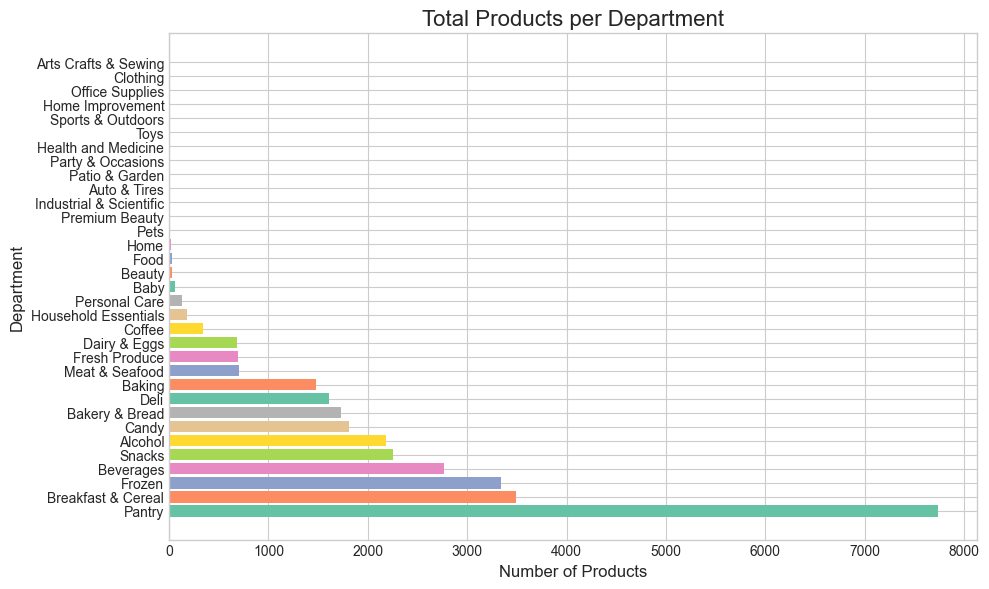

Donut Chart - Top 10 Most Popular Brands


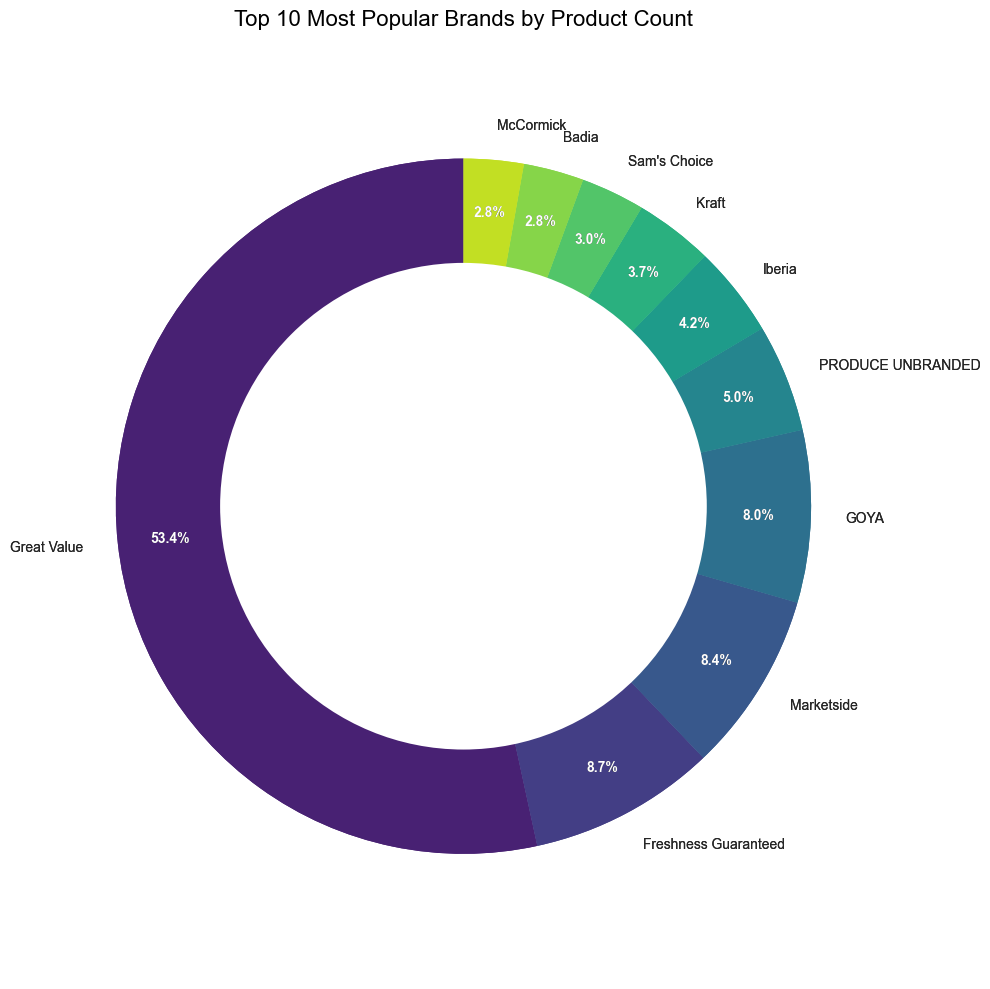

Horizontal Bar Chart - Top 10 Brands by Average Price


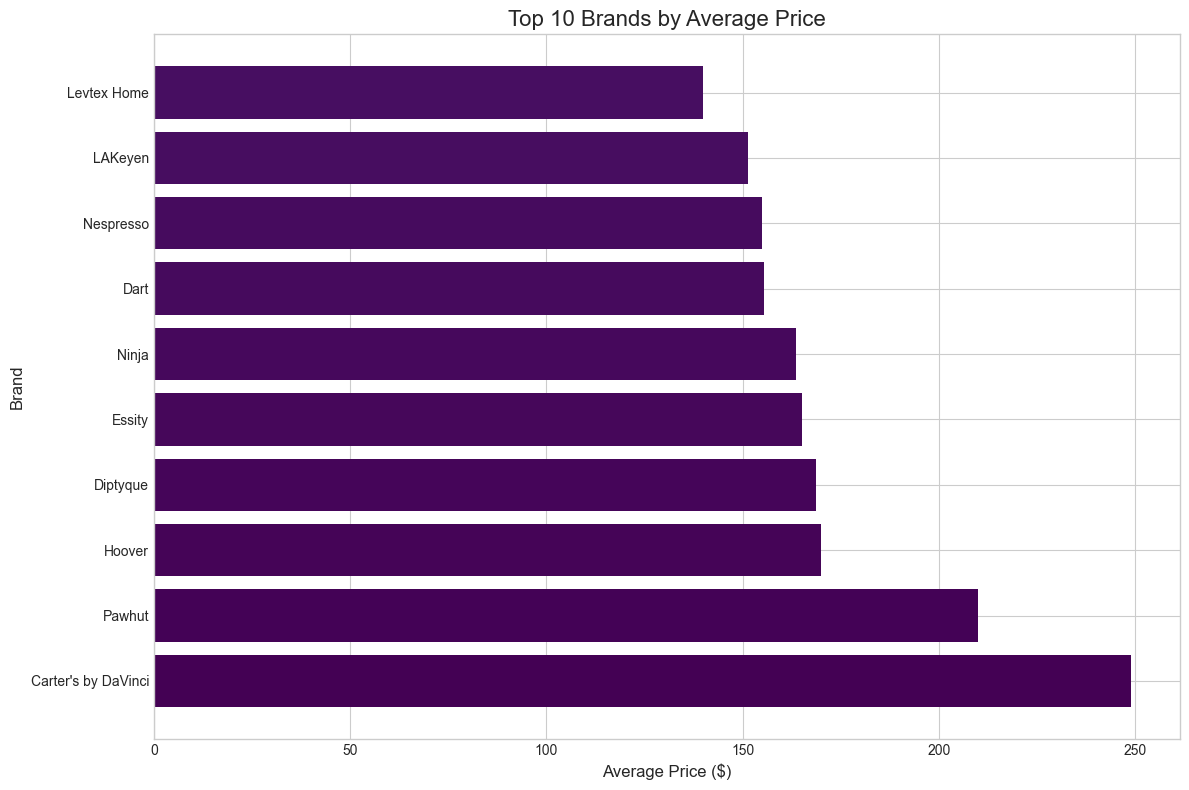

Box Plot - Price Distribution by Department


C:\Users\Angel Dawn\AppData\Local\Temp\ipykernel_10300\2736452113.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='department_name', y='price', data=df_price_dist_dept, palette='viridis')


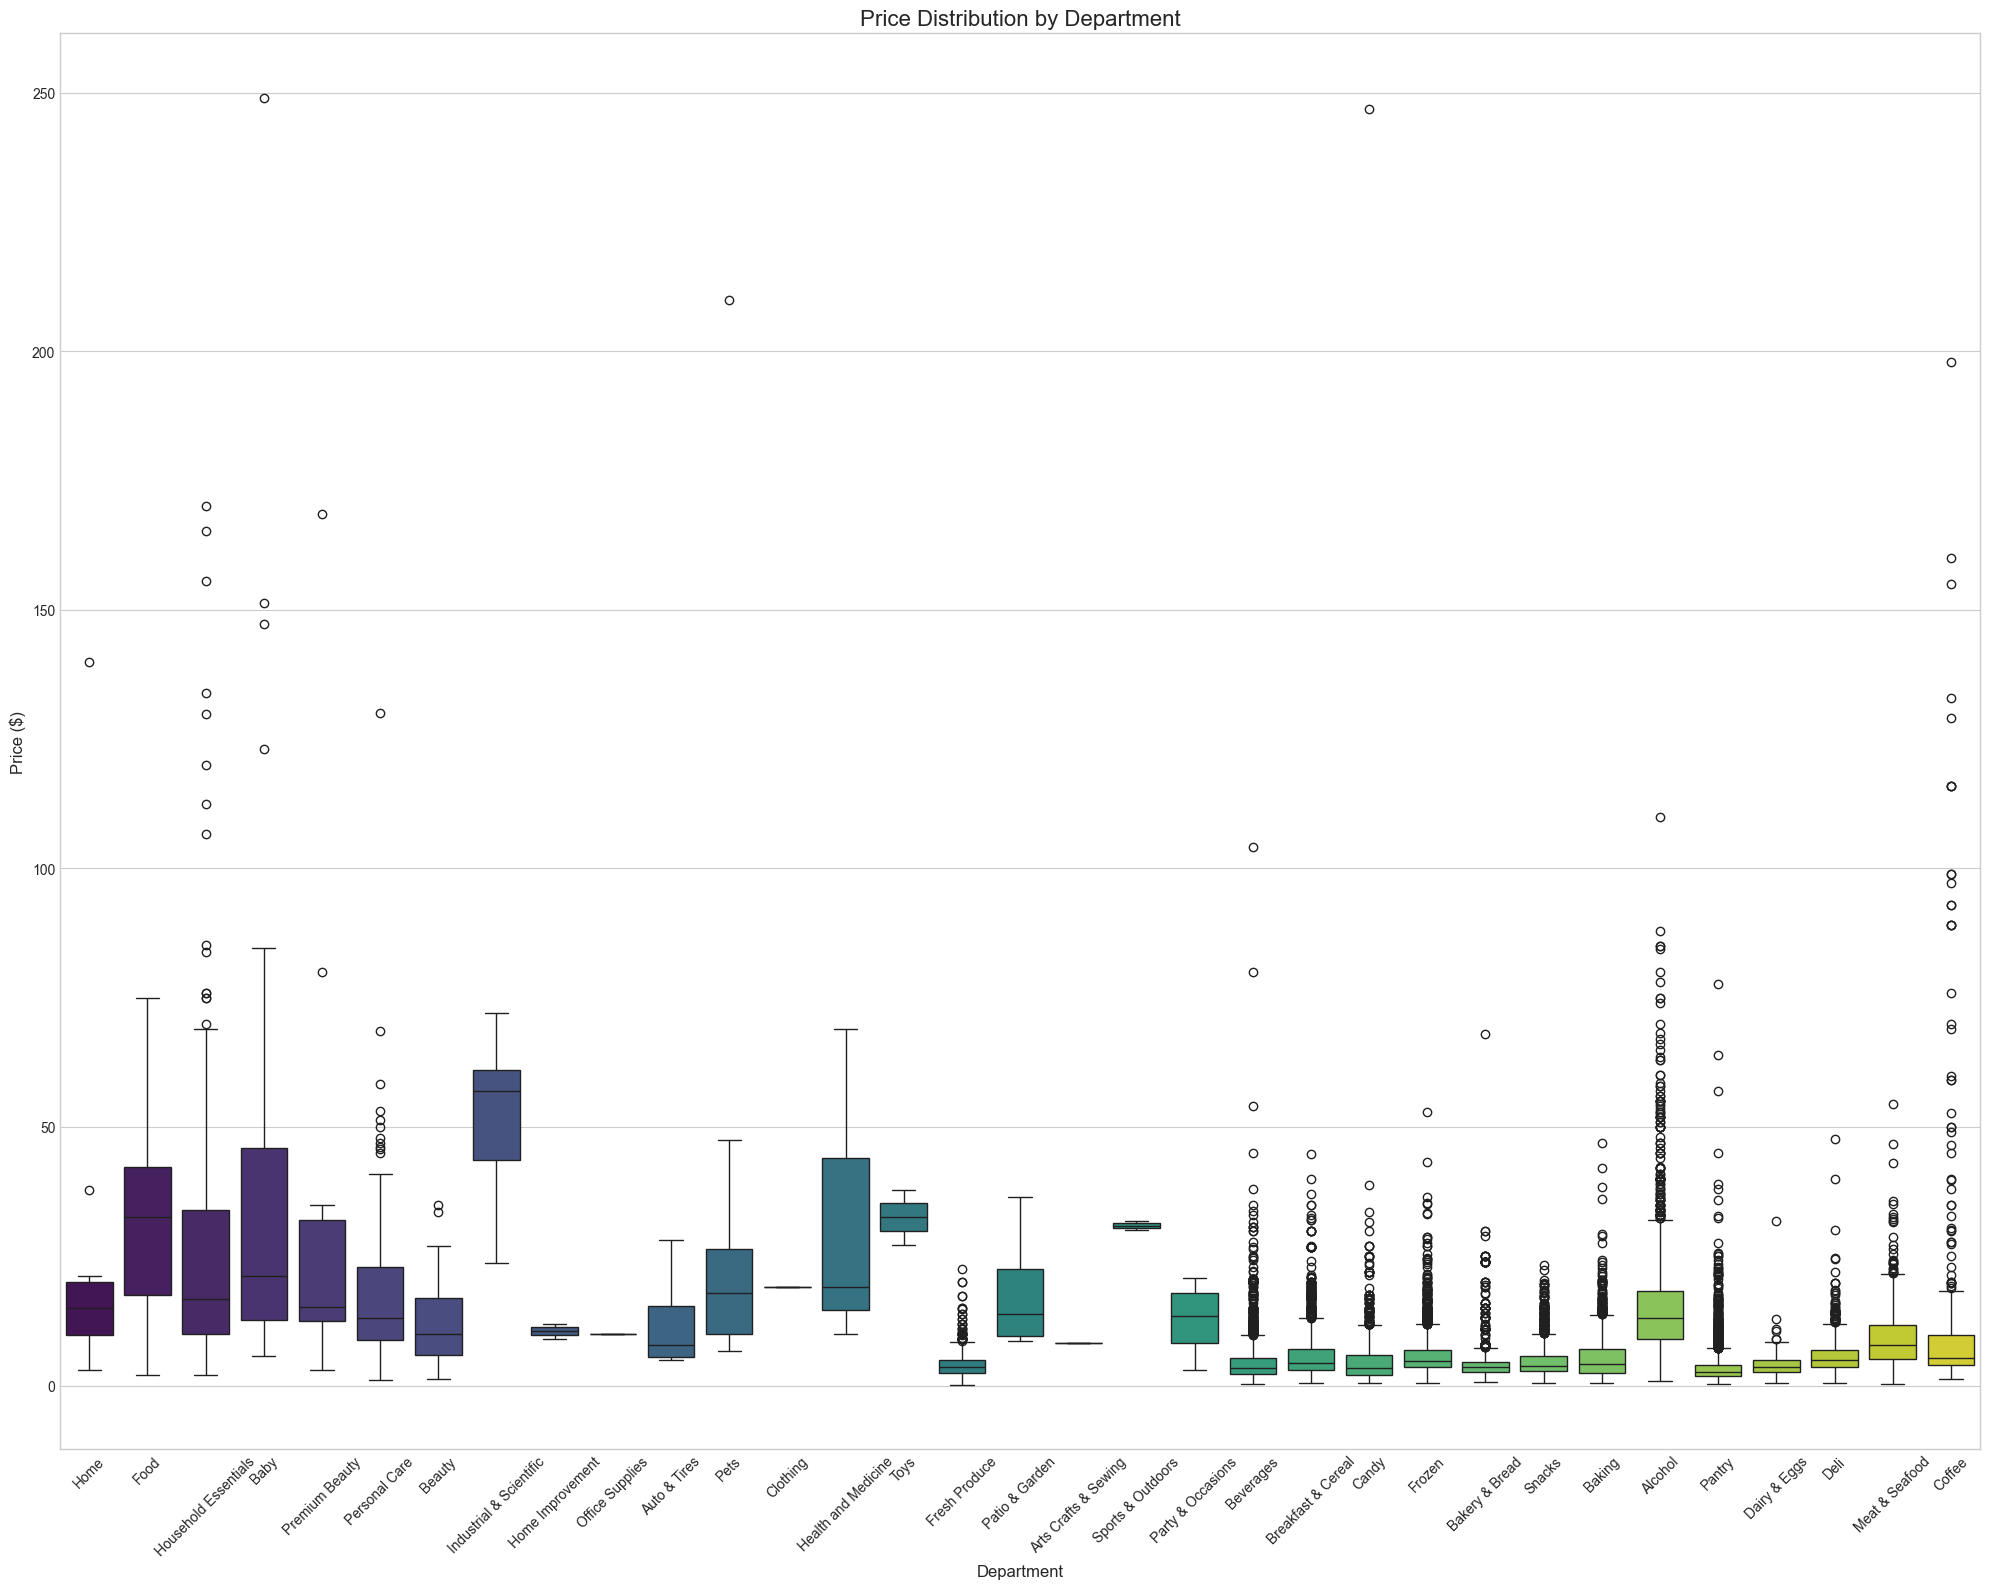

Horizontal Bar Chart - Top 10 Most Expensive Products


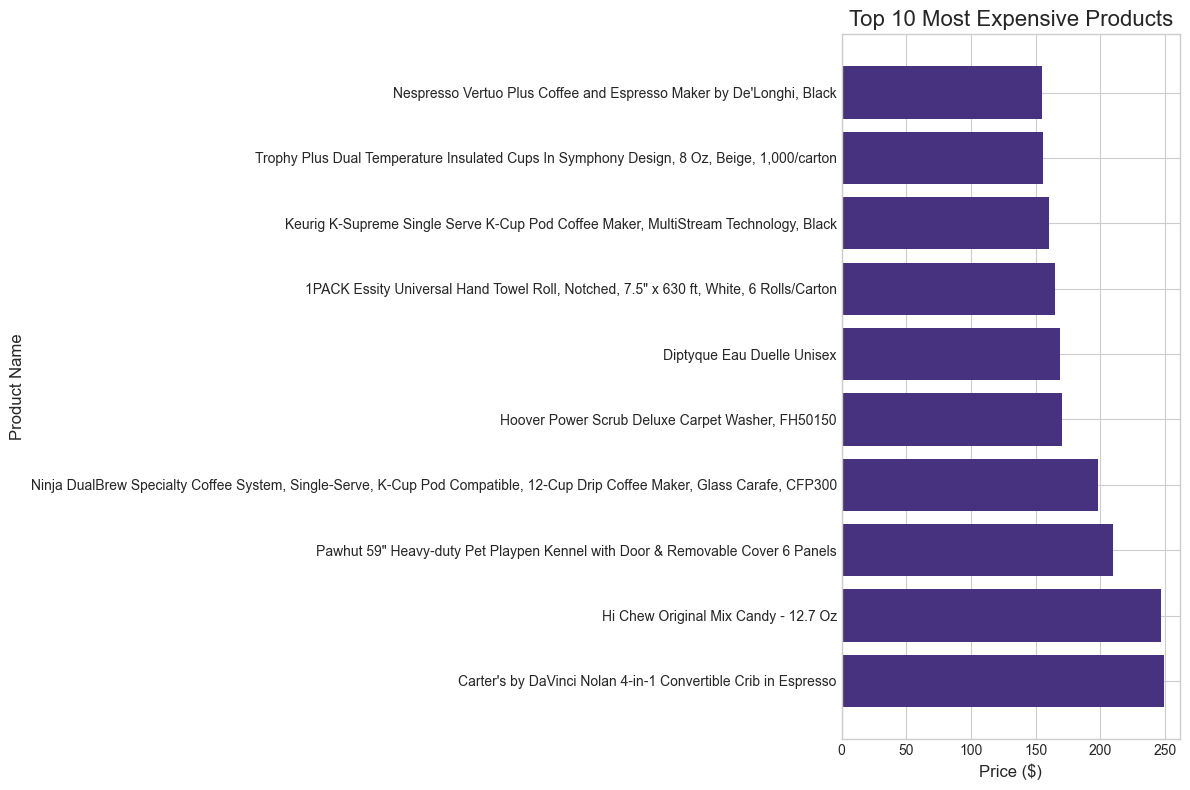

Horizontal Bar Chart - Total Value by Department


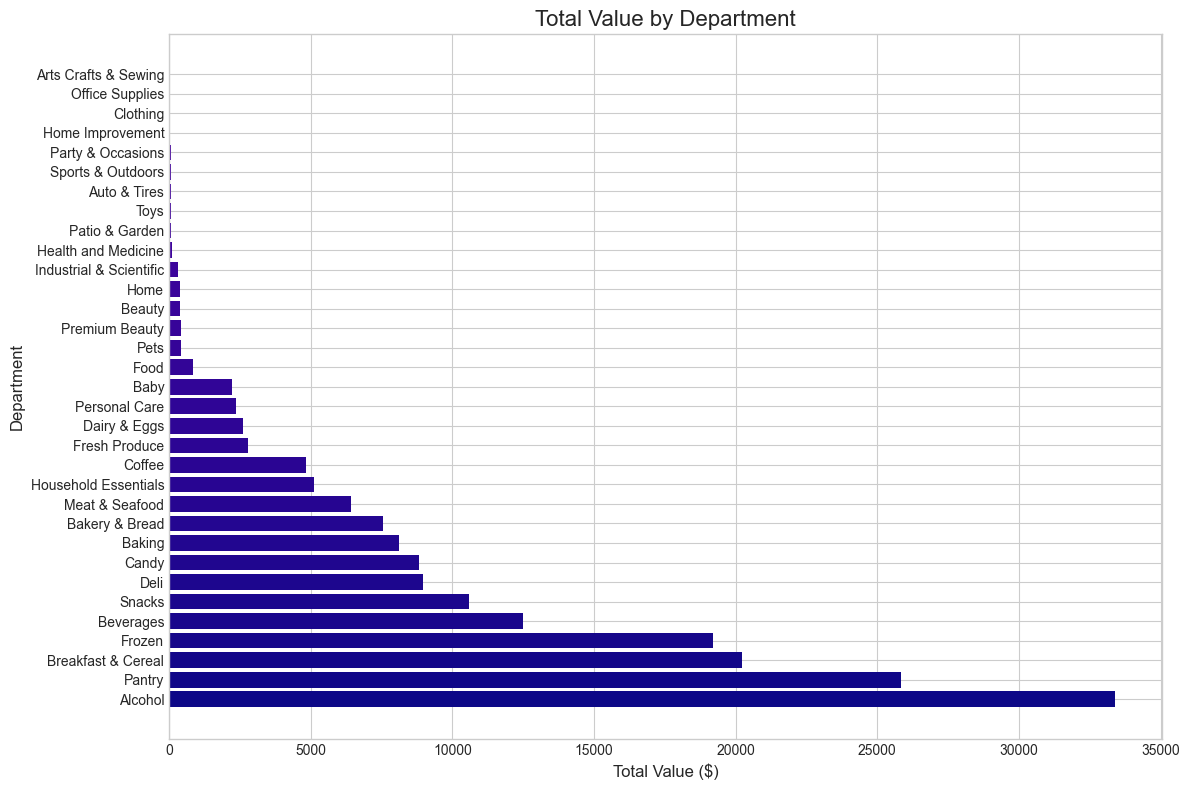

Horizontal Bar Chart - Top 5 Subcategories by Average Price


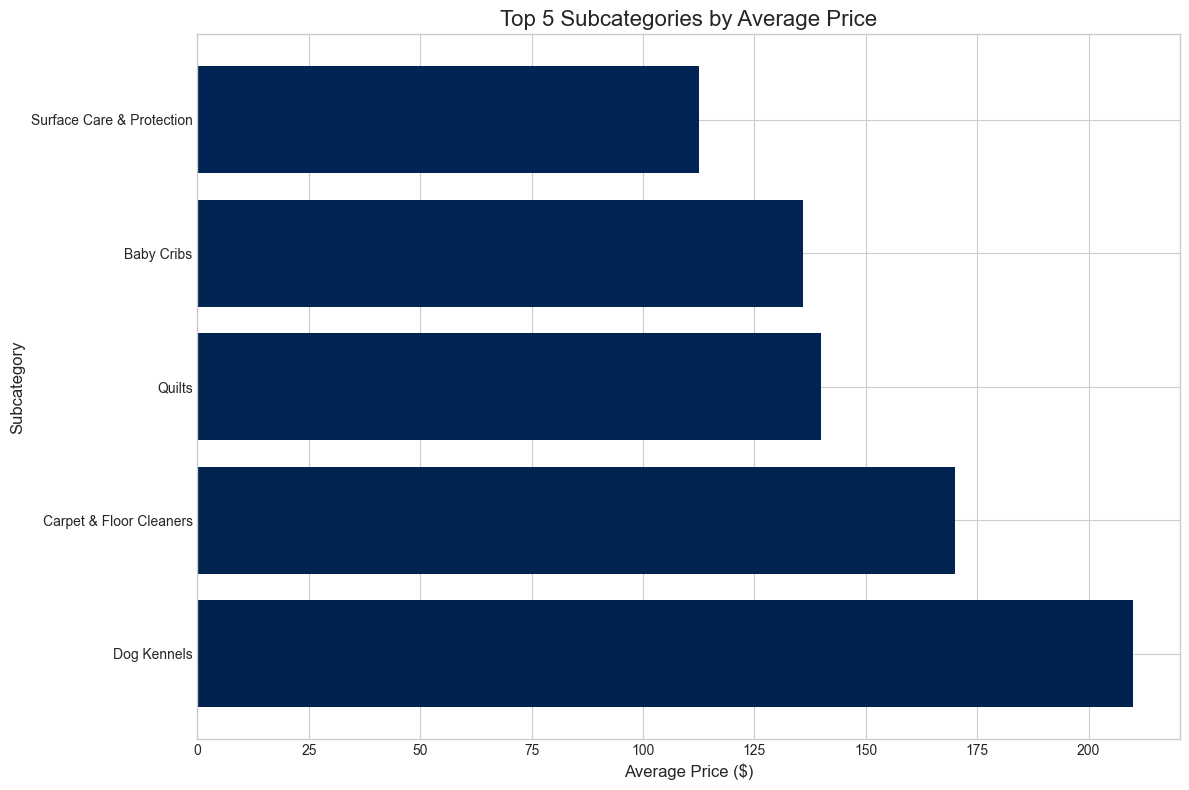

In [67]:
conn = sqlite3.connect(db_name)
cursor = conn.cursor()

#Horizontal Bar Chart - Total Products per Department
print('Horizontal Bar Chart - Total Products per Department')
query_bar_dept = """
SELECT T2.department_name, COUNT(T1.product_id) AS product_count
FROM Products AS T1
JOIN Categories AS T3 ON T1.category_id = T3.category_id
JOIN Departments AS T2 ON T3.department_id = T2.department_id
GROUP BY T2.department_name
ORDER BY product_count DESC;
"""
df_bar_dept = pd.read_sql_query(query_bar_dept, conn)
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(df_bar_dept['department_name'], df_bar_dept['product_count'], color=plt.cm.Set2.colors)
ax.set_title('Total Products per Department', fontsize=16)
ax.set_xlabel('Number of Products', fontsize=12) 
ax.set_ylabel('Department', fontsize=12) 
plt.tight_layout()
plt.show()

#Donut Chart - Top 10 Most Popular Brands
print("Donut Chart - Top 10 Most Popular Brands")
sql_top_brands_count = """
SELECT
    B.brand_name,
    COUNT(P.product_id) AS product_count
FROM Brands AS B
INNER JOIN Products AS P ON B.brand_id = P.brand_id
GROUP BY B.brand_name
ORDER BY product_count DESC
LIMIT 10;
"""
df_top_brands_count = pd.read_sql(sql_top_brands_count, conn)

plt.figure(figsize=(10, 10))
# Create a pie chart
plt.pie(df_top_brands_count['product_count'], labels=df_top_brands_count['brand_name'],
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=sns.color_palette("viridis", len(df_top_brands_count)))

# Create a pie chart and capture the return values
_, _, autotexts = plt.pie(df_top_brands_count['product_count'], labels=df_top_brands_count['brand_name'],
                           autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=sns.color_palette("viridis", len(df_top_brands_count)))

# Loop through the autotexts objects and set their color
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold') 

# Draw a circle in the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Top 10 Most Popular Brands by Product Count', fontsize=16, color='black')
plt.axis('equal') 
plt.tight_layout()
plt.show()

#Horizontal Bar Chart - Top 10 Brands by Average Price
print("Horizontal Bar Chart - Top 10 Brands by Average Price")
query_top_brands_avg_price = """
SELECT B.brand_name, AVG(Pr.price) AS average_price
FROM Products AS P
JOIN Brands AS B ON P.brand_id = B.brand_id
JOIN Prices AS Pr ON P.product_id = Pr.product_id
GROUP BY B.brand_name
ORDER BY average_price DESC
LIMIT 10;
"""
df_top_brands_avg_price = pd.read_sql(query_top_brands_avg_price, conn)

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(df_top_brands_avg_price['brand_name'], df_top_brands_avg_price['average_price'], color=plt.cm.viridis.colors)
ax.set_title('Top 10 Brands by Average Price', fontsize=16)
ax.set_xlabel('Average Price ($)', fontsize=12)
ax.set_ylabel('Brand', fontsize=12)
plt.tight_layout()
plt.show()


#Box Plot - Price Distribution by Department
print('Box Plot - Price Distribution by Department')
query_price_dist_dept = """
SELECT D.department_name, Pr.price
FROM Prices AS Pr
JOIN Products AS P ON Pr.product_id = P.product_id
JOIN Categories AS C ON P.category_id = C.category_id
JOIN Departments AS D ON C.department_id = D.department_id;
"""
df_price_dist_dept = pd.read_sql(query_price_dist_dept, conn)

plt.figure(figsize=(20, 16))
sns.boxplot(x='department_name', y='price', data=df_price_dist_dept, palette='viridis')
plt.title('Price Distribution by Department', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Horizontal Bar Chart - Top 10 Most Expensive Products
print('Horizontal Bar Chart - Top 10 Most Expensive Products')
query_top_10_expensive = """
SELECT P.product_name, Pr.price
FROM Products AS P
JOIN Prices AS Pr ON P.product_id = Pr.product_id
ORDER BY Pr.price DESC
LIMIT 10;
"""
df_top_10_expensive = pd.read_sql(query_top_10_expensive, conn)

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(df_top_10_expensive['product_name'], df_top_10_expensive['price'])
ax.set_title('Top 10 Most Expensive Products', fontsize=16)
ax.set_xlabel('Price ($)', fontsize=12)
ax.set_ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()


#Horizontal Bar Chart - Total Value by Department
print('Horizontal Bar Chart - Total Value by Department')
query_total_value_dept = """
SELECT D.department_name, SUM(Pr.price) AS total_value
FROM Prices AS Pr
JOIN Products AS P ON Pr.product_id = P.product_id
JOIN Categories AS C ON P.category_id = C.category_id
JOIN Departments AS D ON C.department_id = D.department_id
GROUP BY D.department_name
ORDER BY total_value DESC;
"""
df_total_value_dept = pd.read_sql(query_total_value_dept, conn)

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(df_total_value_dept['department_name'], df_total_value_dept['total_value'], color=plt.cm.plasma.colors)
ax.set_title('Total Value by Department', fontsize=16)
ax.set_xlabel('Total Value ($)', fontsize=12)
ax.set_ylabel('Department', fontsize=12)
plt.tight_layout()
plt.show()


#Horizontal Bar Chart - Top 5 Subcategories by Average Price
print('Horizontal Bar Chart - Top 5 Subcategories by Average Price')
query_top_5_subcat_avg_price = """
SELECT C.subcategory_name, AVG(Pr.price) AS average_price
FROM Products AS P
JOIN Categories AS C ON P.category_id = C.category_id
JOIN Prices AS Pr ON P.product_id = Pr.product_id
GROUP BY C.subcategory_name
ORDER BY average_price DESC
LIMIT 5;
"""
df_top_5_subcat_avg_price = pd.read_sql(query_top_5_subcat_avg_price, conn)

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(df_top_5_subcat_avg_price['subcategory_name'], df_top_5_subcat_avg_price['average_price'], color=plt.cm.cividis.colors)
ax.set_title('Top 5 Subcategories by Average Price', fontsize=16)
ax.set_xlabel('Average Price ($)', fontsize=12)
ax.set_ylabel('Subcategory', fontsize=12)
plt.tight_layout()
plt.show()

#Close the connection
conn.close()